<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#The-leaky-integrate-and-ﬁre-(LIF)" data-toc-modified-id="The-leaky-integrate-and-ﬁre-(LIF)-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>The leaky integrate-and-ﬁre (LIF)</a></span><ul class="toc-item"><li><span><a href="#Simulate" data-toc-modified-id="Simulate-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Simulate</a></span></li><li><span><a href="#F--I-plot" data-toc-modified-id="F--I-plot-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>F- I plot</a></span></li><li><span><a href="#simulate-with-changing-$I(t)$" data-toc-modified-id="simulate-with-changing-$I(t)$-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>simulate with changing $I(t)$</a></span></li></ul></li></ul></div>

# The leaky integrate-and-ﬁre (LIF)

The leaky integrate-and-ﬁre (LIF) neuron is probably one of the simplest spiking neuron
models, but it is still very popular due to the ease with which it can be analyzed and simulated. In its simplest form, a neuron is modeled as a “leaky integrator” of its input $I(t)$:

\begin{equation}
\tau_{m} \frac{dv}{dt} = - v(t) + RI(t)
\end{equation}

where $v(t)$ represents the membrane potential at time $t$, $\tau_m$ is the membrane time constant and $R$ is the membrane resistance. This equation describes a simple resistor-capacitor (RC) circuit where the leakage term is due to the resistor and the integration of $I(t)$ is due to the capacitor that is in parallel to the resistor.

we know that $v(t) = u(t) - u_{rest}$ , $I(t)= I_{0}$ . we want solve equation(1):
\begin{equation}
v(t)= R.I_0(1− e^{-\frac{(t - t_{0})}{\tau_{m}}})=u(t)− u_{rest}
\end{equation}
so we have :
\begin{equation}
R.I_0(1− e^{-\frac{(t - t_{0})}{\tau_{m}}})+ u_{rest}= u(t)
\end{equation}

You can find solution of ODE in [stackexchange](https://math.stackexchange.com/questions/2885170/how-to-solve-the-leaky-integrate-and-fire-ode).

we have $\theta$ as threshold when u(t)pass, its amount comes to $u_{rest}$

\begin{equation}
u(t)\geq \theta \rightarrow u(t) = u_{rest}
\end{equation}

## Simulate

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from random import randint

In [2]:
#Init variables
T       =   1000.00000                     # total simulation length [s]
dt      =   0.00005                       #  step size [s]
time    =   np.arange(0, T+dt, dt)        # step values [s]

t_spike =   []           #when we have spike add them to this list
I_spike =   []           #when we have spike add them to this list
F_spike =   []

R       =    100
t_m     =    100

u_rest  =    25

I       =    np.zeros(len(time))

V       =    np.empty(len(time))
V[0]    =    0

U       =    np.empty(len(time))

thetha  =    350

In [3]:
# reset variables 
def init_vars():
    global t_spike
    t_spike =   []
    global I_spike
    I_spike =   []
    global I      
    I = np.zeros(len(time))
    global V      
    V = np.empty(len(time))
    V[0] = 0
    global U 
    U = np.empty(len(time))

In [4]:
# update I when a new flow came in system
#t_start : when flow come in system
#t_end : when flow come out from  system

def enter_I(t_start,t_finist,I_input):
    start  = int(t_start/dt)
    finist = int(t_finist/dt)
    n = int(T/dt)
    
    if start > n:
        start = n
        
    if finist > n:
        finist = n
    
    I[start:finist]  =  I[start:finist] + I_input

In [5]:
# simulate neuron with spike
# if U(t) >= thetha this mean spike: U(t)= u_rest & t0 changed
def simulate_ristict():  
    counter = 0
    global U
    t0 = time[0]
    for i,t in enumerate(time):
        V[i] = R * I[i] *(1 - np.exp((-(t-t0)/t_m)))
        temp = V[i] - u_rest
        
        if temp < thetha :
            U[i] = temp
        else:
            U[i] = u_rest
            counter += 1
            if counter == 2:
                t_spike.append(t-t0)
                I_spike.append(I[i])
            t0 = t 

In [6]:
# make pandas dataframe for save results
def make_dataframe():
    data = pd.DataFrame(data = {'u': U , 'time':time , 'I':I})
    data['u'] = data['u'].round(4)
    data = data.set_index('time')
    return data 

In [7]:
# plot "I(t)-time" & "U(t)-time"
def plot(data):
    
    fig, axes = plt.subplots(nrows=0, ncols=0,figsize=(25,15))
    fig.suptitle('Results', fontsize=25)

    f1 = data.plot(kind='line',y='u',color='red'
            ,title = 'U-time',figsize=(15,5)).set_ylabel('U(t)')  
    plt.axhline(y=thetha, color='black', linestyle='--')
    
    plt.show()

    f2 = data.plot(kind='line',y='I',color='blue'
            ,title = 'I-time',figsize=(15,5)).set_ylabel('I(t)')

<Figure size 1800x1080 with 0 Axes>

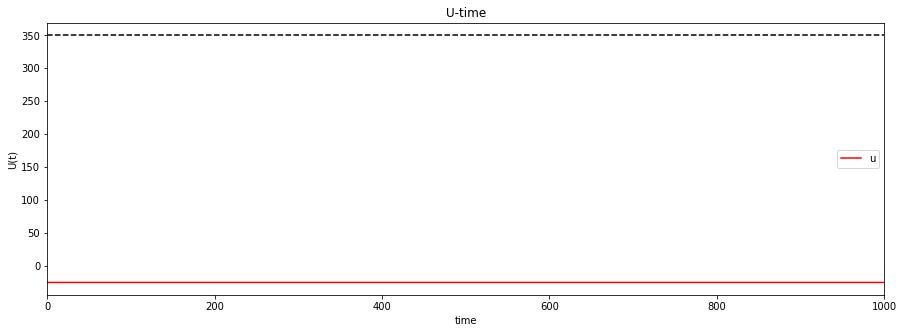

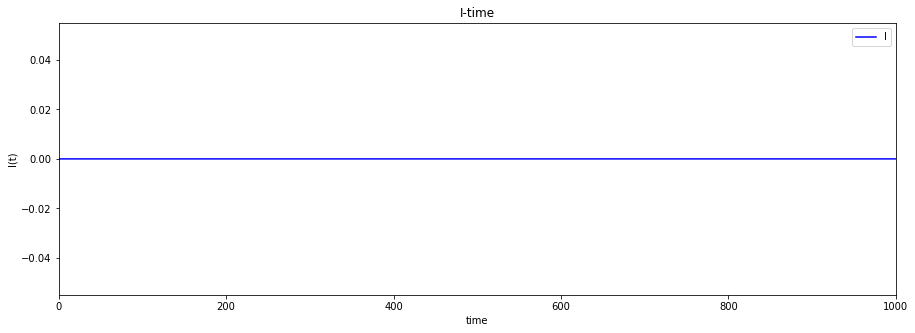

In [8]:
#first simulate
#I = 0A
#I enter from 0s to 1000s(end).

init_vars()
enter_I(0,T+dt,0)
simulate_ristict()
data = make_dataframe()
plot(data)

<Figure size 1800x1080 with 0 Axes>

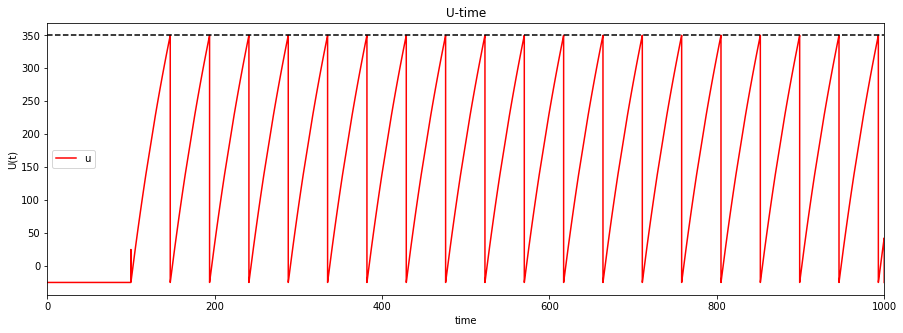

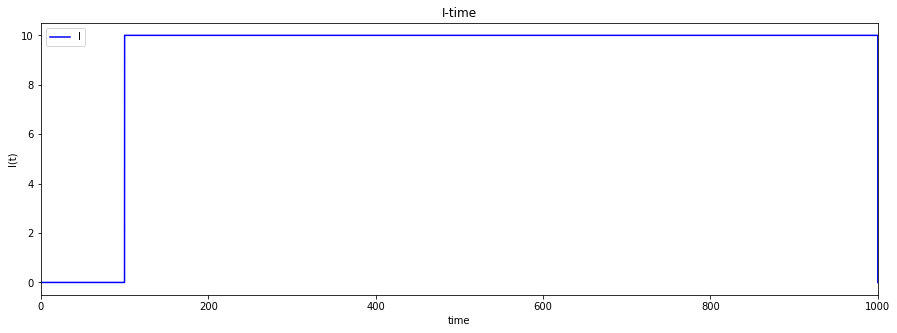

In [9]:
#second simulate
#I = 10A
#I enter from 100s to 1000s(end).

init_vars()
enter_I(100,T+dt,10)
simulate_ristict()
data = make_dataframe()
plot(data)

<Figure size 1800x1080 with 0 Axes>

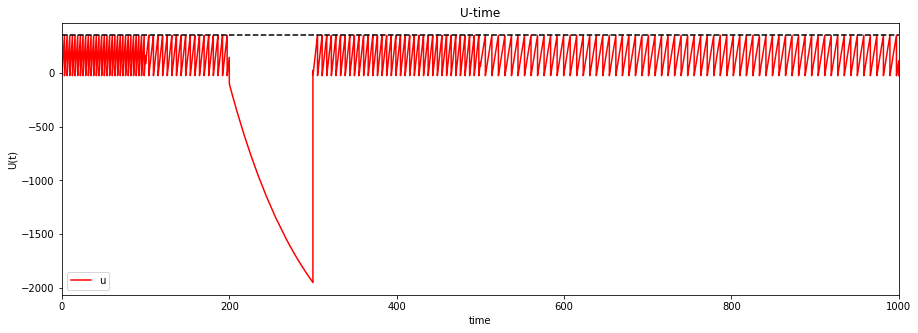

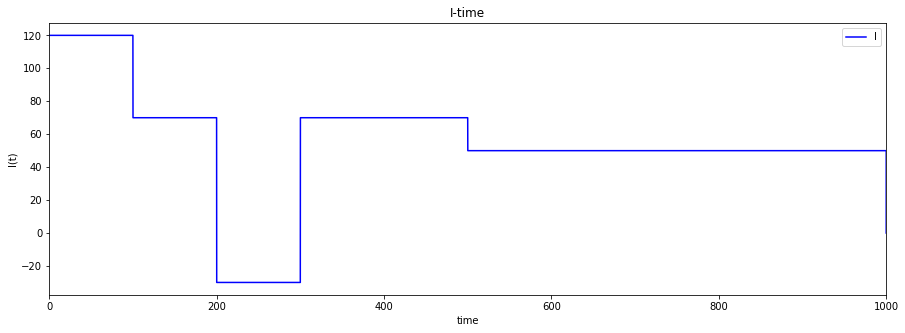

In [10]:
#third simulate
#I1 = 120A
#I1 enter from 0s to 1000s(end)
#I2 = 20A
#I2 enter from 100s to 500s
#I3 = -100A
#I3 enter from 200s to 300s
#I4 = -70A
#I4 enter from 100s to 1000s(end)

init_vars()
enter_I(0,T+dt,120)
enter_I(100,500,20)
enter_I(200,300,-100)
enter_I(100,T+dt,-70)
simulate_ristict()
data = make_dataframe()
plot(data)

In [11]:
#simulate 3 different configuration

init_vars()
enter_I(10,T+dt,3)
simulate_ristict()
data1 = make_dataframe()

init_vars()
enter_I(20,T+dt,6)
simulate_ristict()
data2 = make_dataframe()

init_vars()
enter_I(40,T+dt,9)
simulate_ristict()
data3 = make_dataframe()

init_vars()

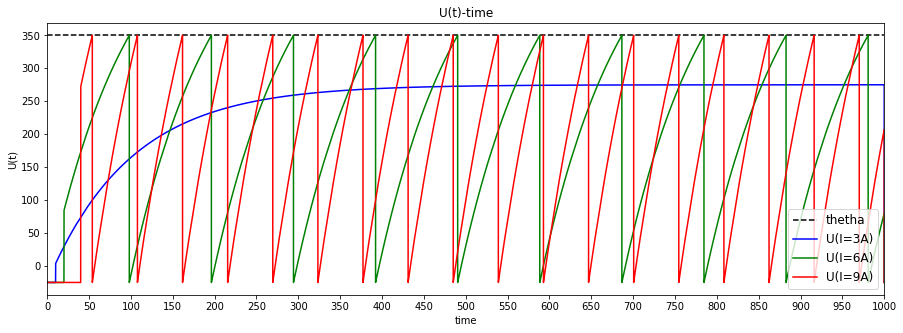

In [12]:
ax = plt.gca(title = 'U(t)-time')
plt.axhline(y=thetha, color='black', linestyle='--')
data1.plot(kind='line',y='u',color='blue',ax=ax,figsize=(15,5) ,xticks= range(0,1050,50)).set_ylabel('U(t)')
data2.plot(kind='line',y='u', color='green', ax=ax)
data3.plot(kind='line',y='u', color='red', ax=ax)
ax.legend(["thetha","U(I=3A)", "U(I=6A)" , "U(I=9A)"],prop={'size': 12},loc='lower right')

plt.show()

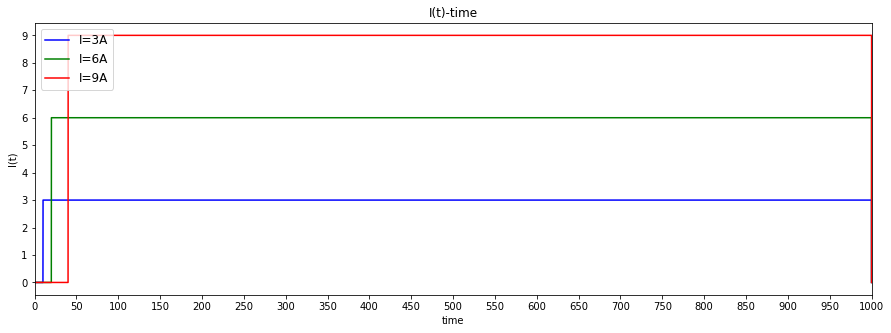

In [13]:
ax = plt.gca(title = 'I(t)-time')
data1.plot(kind='line',y='I',color='blue',ax=ax ,figsize=(15,5),yticks= range(0,10,1),xticks= range(0,1050,50)).set_ylabel('I(t)')
data2.plot(kind='line',y='I', color='green', ax=ax)
data3.plot(kind='line',y='I', color='red', ax=ax)

ax.legend(["I=3A", "I=6A" , "I=9A"],prop={'size': 12},loc='upper left')

plt.show()

In [14]:
#release memory
del data1
del data2
del data3

## F- I plot

when we have spike , we see we have periodic signal.

we simulate system that I start from 1 to 5 to find different T.

In [15]:
#Init variables
T       =   200.00000                     # total simulation length [s]
dt      =   0.0005                       #  step size [s]
time    =   np.arange(0, T+dt, dt)        # step values [s]

t_spike =   []           #when we have spike add them to this list
I_spike =   []           #when we have spike add them to this list
F_spike =   []

R       =    10
t_m     =    6

u_rest  =    0

I       =    np.zeros(len(time))

V       =    np.empty(len(time))
V[0]    =    0

U       =    np.empty(len(time))

thetha  =    15

In [16]:
def plot_F_I(list_t_spike,list_I_spike):
    start_s = 0
    for items in list_t_spike:
        if items != 0:
            start_s = items
            break
    fig = plt.figure(figsize=(10,5))
    plt.axhline(y=start_s, color='black', linestyle='--')
    plt.plot(list_I_spike ,list_t_spike)
    fig.suptitle('F-I chart', fontsize=20)
    plt.xlabel('I', fontsize=18)
    plt.ylabel('F', fontsize=16)
    plt.show()

In [17]:
list_data = []
list_I_spike = []
list_t_spike = []
for i in range(0,50):
    init_vars()
    enter_I(0,T+dt,0 +(i/10))
    simulate_ristict()
    data = make_dataframe()
    list_data.append(data)
    if len(t_spike)>0:
        list_t_spike.append(round(1/t_spike[0],3))
        list_I_spike.append(I_spike[0])
    elif len(t_spike)== 0:
        list_t_spike.append(0)
        list_I_spike.append(round(0 +(i/10),3))

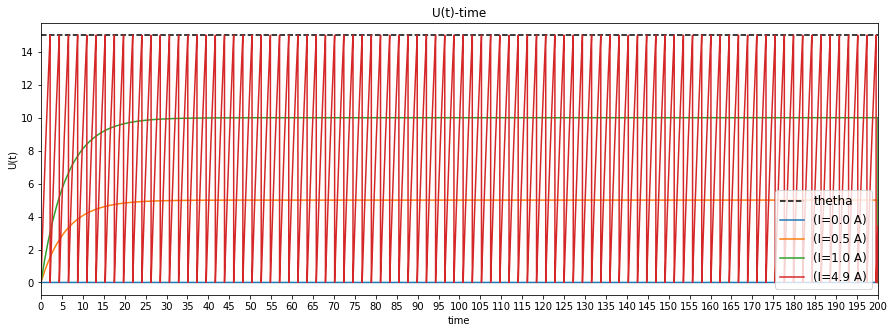

In [18]:
list_i = []
ax = plt.gca(title = 'U(t)-time')
plt.axhline(y=thetha, color='black', linestyle='--')

for i in [0,5,10,49]:
    if i == 0:
        list_data[i].plot(kind='line',y='u',ax=ax ,figsize=(15,5),
                          xticks= range(0,205,5)).set_ylabel('U(t)')
    else:
        list_data[i].plot(kind='line',y='u',ax=ax)
        
    list_i.append(0 +(i/10))
    
    
ax.legend(["thetha" ,"(I=" + str(list_i[0]) +" A)", "(I=" + str(list_i[1]) +" A)" 
           , "(I=" + str(list_i[2]) +" A)"
           , "(I=" + str(list_i[3]) +" A)"
          ],prop={'size': 12},loc='lower right')        
plt.show()

In [19]:
#release memory
del list_data

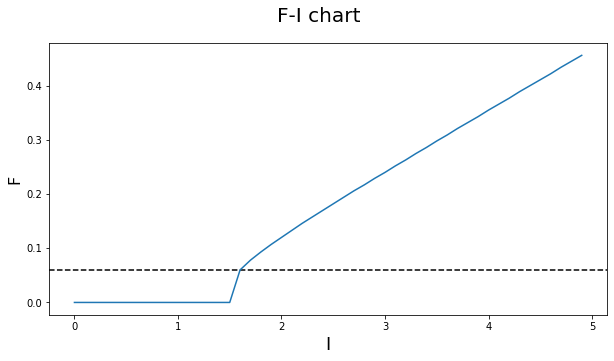

In [20]:
plot_F_I(list_t_spike,list_I_spike)

## simulate with changing $I(t)$

\begin{equation}
\tau_{m} \frac{dv}{dt} = - v(t) + RI(t)
\end{equation}

if $/delta t \approx 0$ then:
\begin{equation}
\tau_{m} \frac{u(t+\delta t) - u(t)}{\delta t} = - (u(t) - u_{rest}) + RI(t)
\end{equation}
\begin{equation}
u(t+\delta t) - u(t)= \frac{\delta t}{\tau_{m}} \big(- (u(t) - u_{rest}) + RI(t)\big)
\end{equation}
\begin{equation}
u(t+\delta t) = \frac{\delta t}{\tau_{m}} \big(- (u(t) - u_{rest}) + RI(t)\big) + u(t)
\end{equation}

In [28]:
#Init variables
T       =   1.00000                     # total simulation length [s]
dt      =   0.01                       #  step size [s]
time    =   np.arange(0, T+dt, dt)        # step values [s]


R       =    100
t_m     =    25

u_rest  =    20

I       =    np.zeros(len(time))

U       =    np.empty(len(time))
U[0]    =    u_rest

thetha  =    70

In [29]:
def init():
    global I
    global U

    I       =    np.zeros(len(time))
    U       =    np.empty(len(time))
    U[0]    =    u_rest

In [30]:
def simulate():
    t0 = time[0]
    for i,t in enumerate(time):
        U[i+1] = U[i] + (dt/t_m)*(-(U[i]- u_rest) + R*I[i])
        if U[i+1] >= thetha:
            U[i+1] = u_rest

In [31]:
# update I when a new flow came in system
#t_start : when flow come in system
#t_end : when flow come out from  system

def enter_I(t_start,t_finist,I_input):
    start  = int(t_start/dt)
    finist = int(t_finist/dt)
    n = int(T/dt)
    
    if start > n:
        start = n
        
    if finist > n:
        finist = n
    
    I[start:finist]  =  I[start:finist] + I_input

In [32]:
# make pandas dataframe for save results
def make_dataframe():
    data = pd.DataFrame(data = {'u': U , 'time':time , 'I':I})
    data['u'] = data['u'].round(4)
    data = data.set_index('time')
    return data 

In [33]:
# plot "I(t)-time" & "U(t)-time"
def plot(data):
    
    fig, axes = plt.subplots(nrows=0, ncols=0,figsize=(25,15))
    fig.suptitle('Results', fontsize=25)

    f1 = data.plot(kind='line',y='u',color='red'
            ,title = 'U-time',figsize=(15,5)).set_ylabel('U(t)')  
    plt.axhline(y=thetha, color='black', linestyle='--')
    
    plt.show()

    f2 = data.plot(kind='line',y='I',color='blue'
            ,title = 'I-time',figsize=(15,5)).set_ylabel('I(t)')

<Figure size 1800x1080 with 0 Axes>

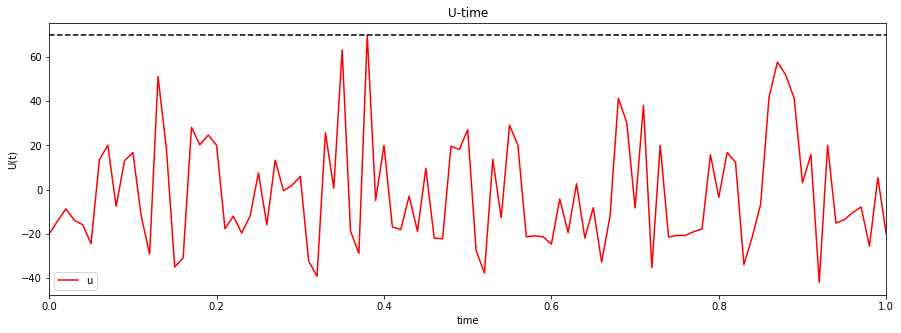

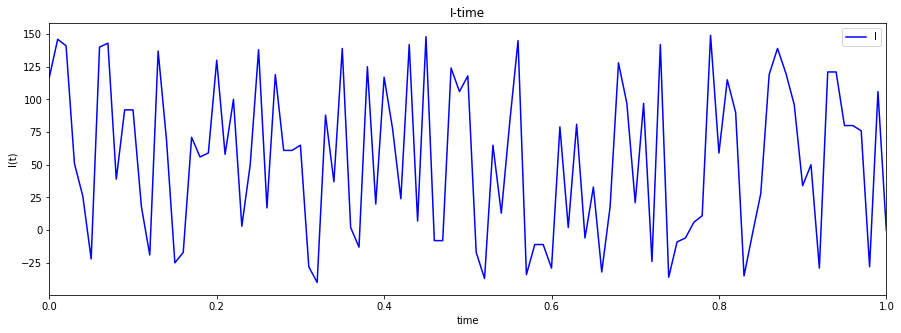

In [34]:
n = 1
for i in range(0,int(T/(n*dt))):
    I_random = round(randint(-40,150),3)
    enter_I(round(i*(n*dt),4),round((i+1)*(n*dt),4),I_random)
simulate_ristict()
data = make_dataframe()
plot(data)    